# Telco Customer Churn Analysis

This notebook analyzes the Telco Customer Churn dataset. We will explore the data, preprocess it, build a machine learning model to predict customer churn, and evaluate the model's performance.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow.keras as tf

# Set plot style
sns.set_theme(style='whitegrid')

In [79]:
# Load the dataset
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Exploration

In [80]:
print('Shape:', churn_df.shape)
print('\nData Types:')
print(churn_df.dtypes)

Shape: (7043, 21)

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [81]:
print('\nMissing Values:')
print(churn_df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [82]:
# 0 - No Churn, 1 - Churn
churn_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

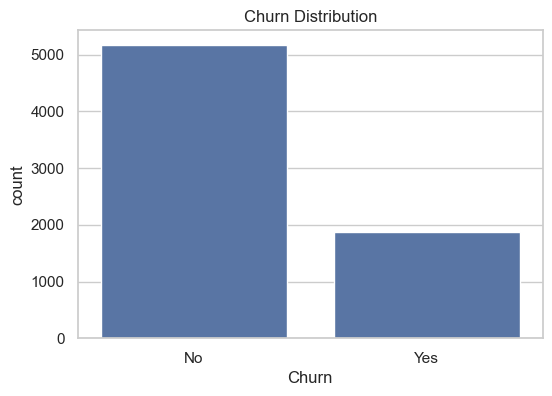

In [83]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=churn_df)
plt.title('Churn Distribution')
plt.show()

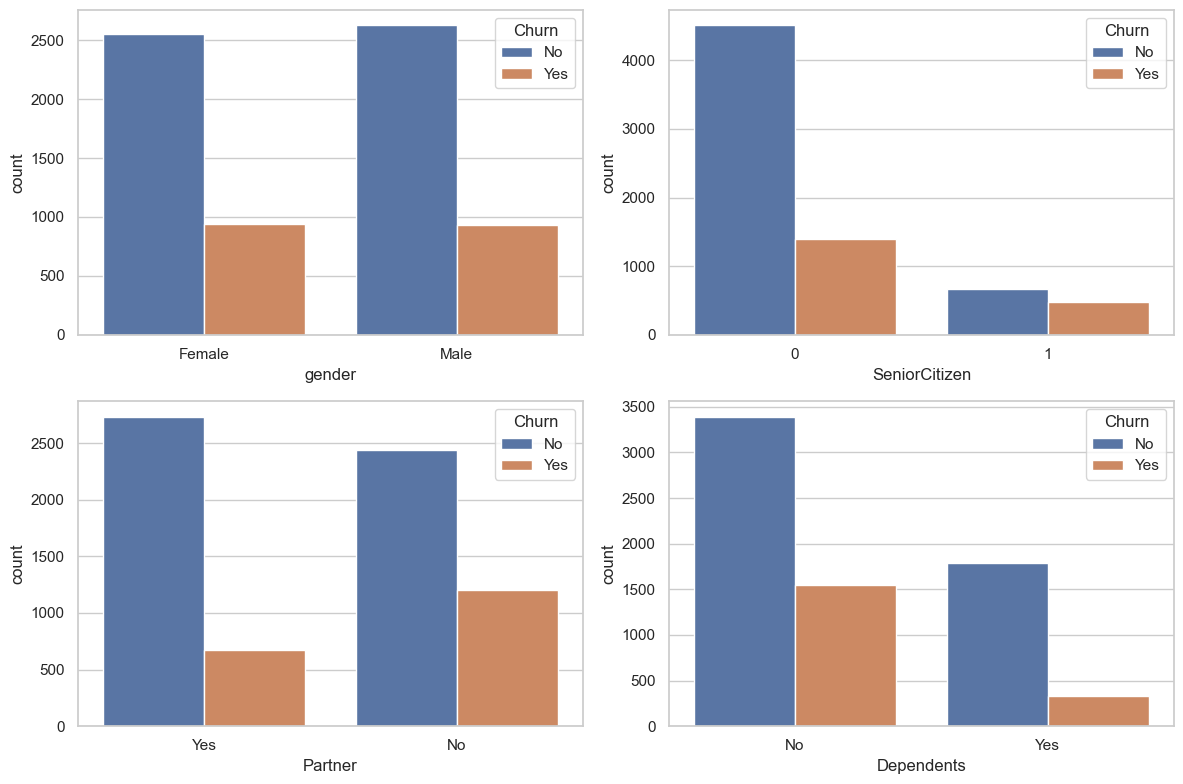

In [84]:
# Visualize categorical features
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.countplot(x='gender', hue='Churn', data=churn_df, ax=axes[0,0])
sns.countplot(x='SeniorCitizen', hue='Churn', data=churn_df, ax=axes[0,1])
sns.countplot(x='Partner', hue='Churn', data=churn_df, ax=axes[1,0])
sns.countplot(x='Dependents', hue='Churn', data=churn_df, ax=axes[1,1])
plt.tight_layout()
plt.show()

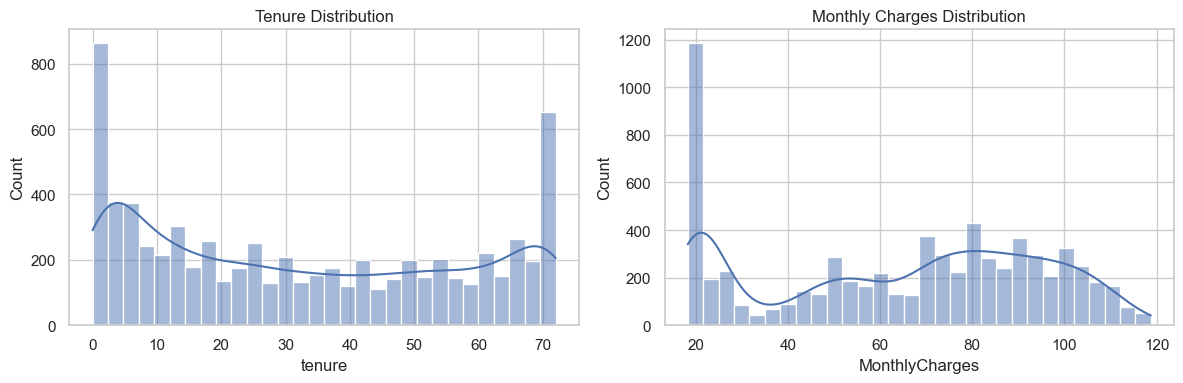

In [85]:
# Visualize numerical features
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(churn_df['tenure'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Tenure Distribution')
sns.histplot(churn_df['MonthlyCharges'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [86]:
# Remove customerID column
churn_df = churn_df.drop('customerID', axis=1)

# Convert TotalCharges to numeric
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# Handle missing values
churn_df['TotalCharges'] = churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].median())

le = LabelEncoder()
# Encode categorical variables
for col in churn_df.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        churn_df[col] = le.fit_transform(churn_df[col])

# Encode target
churn_df['Churn'] = churn_df['Churn'].map({'No': 0, 'Yes': 1})

# Feature scaling
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_df[num_cols] = scaler.fit_transform(churn_df[num_cols])

churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


## Modeling

In [87]:
# Split data
X = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

In [88]:
y_train.value_counts()

Churn
0    4153
1    1481
Name: count, dtype: int64

In [89]:
X.shape

(7043, 19)

In [90]:
# Build a neural network with Keras
model = tf.models.Sequential()

### add the layer
model.add(tf.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.layers.Dense(32,activation='relu'))
model.add(tf.layers.Dense(1,activation="sigmoid"))

## compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100


c:\Users\jonah\anaconda3\envs\AI240-env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5002 - loss: 0.7261 - val_accuracy: 0.7338 - val_loss: 0.5028
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5002 - loss: 0.7261 - val_accuracy: 0.7338 - val_loss: 0.5028
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.4827 - val_accuracy: 0.7791 - val_loss: 0.4472
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.4827 - val_accuracy: 0.7791 - val_loss: 0.4472
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.4479 - val_accuracy: 0.7897 - val_loss: 0.4321
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.4479 - val_accuracy: 0.7897 - val_loss: 0.4321
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7827 - loss: 0.4443 - val_accuracy: 0.7950 - val_loss: 0.4240
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7827 - loss: 0.4443 - val_accuracy: 0.7950 - val_loss: 0.4

In [91]:
# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


## Evaluation

In [93]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.794180269694819



Confusion Matrix:


<Axes: >

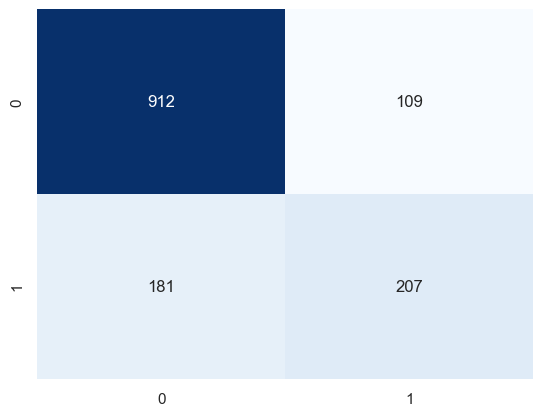

In [94]:
print('\nConfusion Matrix:')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


In [95]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1021
           1       0.66      0.53      0.59       388

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.79      0.79      1409

